# CAR PRICE PREDICTION

In [1]:
# import libraries
import numpy as np
import pandas as pd
# load dataset
data = pd.read_csv("D:\\car data.csv")
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [2]:
print(data.tail())

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
296     city  2016           9.50           11.6       33988    Diesel   
297     brio  2015           4.00            5.9       60000    Petrol   
298     city  2009           3.35           11.0       87934    Petrol   
299     city  2017          11.50           12.5        9000    Diesel   
300     brio  2016           5.30            5.9        5464    Petrol   

    Selling_type Transmission  Owner  
296       Dealer       Manual      0  
297       Dealer       Manual      0  
298       Dealer       Manual      0  
299       Dealer       Manual      0  
300       Dealer       Manual      0  


In [3]:
# describe the data
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
# check the null value
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
data.isnull().sum().sum()

0

In [6]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\anudw\AppData\Local\Temp\ipykernel_10664\786306511.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="RdBu")


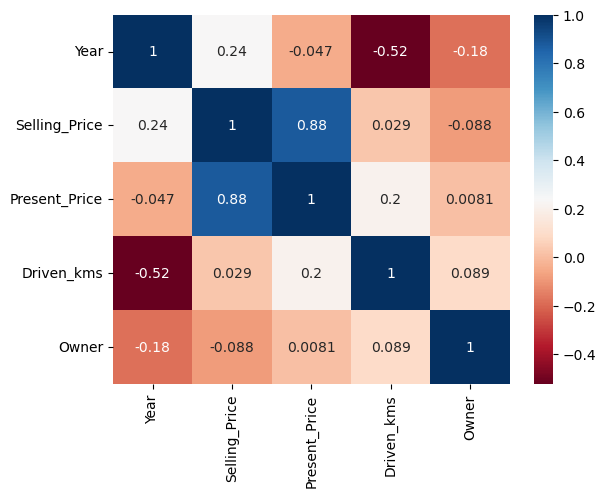

In [7]:
# plot heatmap
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()

In [8]:
# drop the column name car_name
data.drop(labels='Car_Name',axis= 1, inplace = True)
data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
# converting categorial data to numerical data
data = pd.get_dummies(data = data,drop_first=True) 
data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [10]:
# splitting x and y
X = data.drop('Selling_Price', axis = 1)
y = data['Selling_Price']
print('shape of x', X.shape)
print('shape of y', y.shape)

shape of x (301, 8)
shape of y (301,)


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


In [13]:
# model creation
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.8616968925961086

In [14]:
# evaluation ridge model
from sklearn.linear_model import Ridge
rd= Ridge(alpha = 7)
rd.fit(X_train, y_train)
rd.score(X_test, y_test)

0.872400891130718

In [15]:
# predict the value of x_test
y_pred=rd.predict(X_test)
y_pred

array([ 7.42376057,  2.93204176, -0.51386951,  4.19200745,  0.59823196,
        5.84529266,  2.09502782,  2.52874603,  7.8237811 ,  1.11264489,
        7.9984683 ,  3.51200456,  4.89722367,  4.45685117, -2.28139135,
        2.80518663,  7.87884552,  6.61549846,  6.46637402,  7.90512535,
        4.53974672,  4.01803684, 11.06483557,  7.6502642 ,  8.95373461,
        4.68411341,  3.87212186,  1.19032253, -0.46934302, -0.51789185,
        0.11731273, -1.19841149,  4.28371168, 20.43900935, 18.45246051,
        4.28676946,  3.47488141,  1.80163902, -0.13919151,  5.30680099,
        8.17928383,  9.82176684,  0.32495836,  5.90847713,  5.73378314,
        4.33539906,  7.25168525,  5.9194531 ,  8.10471916,  1.80886721,
        3.81565797,  1.88764642,  2.45920694,  4.23469375,  1.6304699 ,
       -3.38601048, 20.27695044,  0.77273364,  5.00470216,  5.6986759 ,
        0.24939727])

In [16]:
# original output of x_test
y_test

285     7.40
248     4.00
150     0.50
217     3.15
107     1.25
       ...  
62     18.75
154     0.50
218     6.45
286     5.65
186     0.25
Name: Selling_Price, Length: 61, dtype: float64

In [17]:
# mean square error and root mean square error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(' mean square error ', mse)
print(' root mean square error ', rmse)

 mean square error  2.7681582900936044
 root mean square error  1.6637783175933039


In [18]:
# save the model
import pickle
pickle.dump(rd, open('car_price_prediction.py', 'wb'))

In [19]:
# deploy the model
model = pickle.load(open('car_price_prediction.py', 'rb'))

In [20]:
#check the model
model.predict(X_test)

array([ 7.42376057,  2.93204176, -0.51386951,  4.19200745,  0.59823196,
        5.84529266,  2.09502782,  2.52874603,  7.8237811 ,  1.11264489,
        7.9984683 ,  3.51200456,  4.89722367,  4.45685117, -2.28139135,
        2.80518663,  7.87884552,  6.61549846,  6.46637402,  7.90512535,
        4.53974672,  4.01803684, 11.06483557,  7.6502642 ,  8.95373461,
        4.68411341,  3.87212186,  1.19032253, -0.46934302, -0.51789185,
        0.11731273, -1.19841149,  4.28371168, 20.43900935, 18.45246051,
        4.28676946,  3.47488141,  1.80163902, -0.13919151,  5.30680099,
        8.17928383,  9.82176684,  0.32495836,  5.90847713,  5.73378314,
        4.33539906,  7.25168525,  5.9194531 ,  8.10471916,  1.80886721,
        3.81565797,  1.88764642,  2.45920694,  4.23469375,  1.6304699 ,
       -3.38601048, 20.27695044,  0.77273364,  5.00470216,  5.6986759 ,
        0.24939727])